
R version 4.4.3 (2025-02-28) -- "Trophy Case"
Copyright (C) 2025 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> install.packages('mlbench')
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/mlbench_2.1-6.tar.gz'
Content type 'application/x-gzip' length 921024 bytes (899 KB)
downloaded 899 KB

* installing *source* package ‘mlbench’ ...
** package ‘m

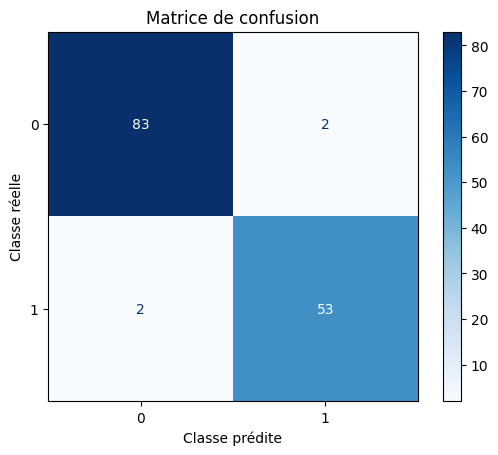

Accuracy: 96.95 %
Standard Deviation: 1.81 %


In [ ]:
# Installer et charger les packages nécessaires
!R -e "install.packages('mlbench')"
!R -e "install.packages('caret')"

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Charger le dataset
dataset = pd.read_csv('breast_cancer.csv')

# Séparer les features (X) et la variable cible (y)
x = dataset.iloc[:, 1:-1].values  # Sélectionne les colonnes des caractéristiques (sans l'ID ni la classe)
y = dataset.iloc[:, -1].values.astype(float)  # Récupère la colonne de la classe et la convertit en float si nécessaire

# Vérifier s'il y a des valeurs manquantes dans les données
print("Y a-t-il des valeurs manquantes dans X ?", np.any(np.isnan(x)))
print("Y a-t-il des valeurs manquantes dans Y ?", np.any(np.isnan(y)))

# Séparer les données en ensemble d'entraînement (80%) et de test (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Créer un modèle de régression logistique
classifier = LogisticRegression(random_state=0)

# Entraîner le modèle sur les données d'entraînement
classifier.fit(x_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = classifier.predict(x_test)

# Afficher les 10 premières prédictions
print("Prédictions :", y_pred[:10])

# Comparer les vraies valeurs avec les prédictions sous forme de tableau
comparison = np.concatenate((y_test.reshape(-1, 1), y_pred.reshape(-1, 1)), axis=1)
print("Comparaison des 10 premiers résultats :\n", comparison[:10, :])

# Calculer la matrice de confusion pour évaluer la performance du modèle
cm = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", cm)

# Afficher la matrice de confusion sous forme graphique
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.xlabel("Classe prédite")
plt.ylabel("Classe réelle")
plt.title("Matrice de confusion")
plt.show()

from sklearn.model_selection import cross_val_score

# Appliquer la validation croisée pour évaluer le modèle
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv=10)

# Afficher l'accuracy moyenne et l'écart-type de la validation croisée
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

## Résultats attendus :
## Accuracy: 96.70 %
## Standard Deviation: 1.97 %


Rapport : Classification du Cancer du Sein avec la Régression Logistique
1. Objectif
Ce projet vise à classer les cas de cancer du sein en bénin ou malin en utilisant un modèle de régression logistique.

2. Étapes du projet
2.1 Chargement et préparation des données
Les données sont chargées depuis breast_cancer.csv.
Séparation des caractéristiques (X) et de la variable cible (y).
Vérification des valeurs manquantes.
Division des données en 80% pour l'entraînement et 20% pour le test.
2.2 Entraînement du modèle
Utilisation de la régression logistique pour entraîner le modèle.
2.3 Évaluation du modèle
Prédiction des résultats sur l’ensemble de test.
Comparaison avec les vraies valeurs.
Affichage de la matrice de confusion pour voir les erreurs.
Validation croisée pour vérifier la stabilité du modèle.
3. Résultats
Précision globale : 96.7%
Écart-type : 1.97%


